In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
column_names = ['sepal length','sepal width','petal length','petal width', 'class']

In [3]:
iris = pd.read_csv('iris.data',names=column_names,index_col=False)

In [4]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df = pd.DataFrame()
iris_obj=pd.DataFrame()

In [6]:
def get_class(x):
    if x=='Iris-setosa':
        return 0
    elif(x=='Iris-versicolor'):
        return 1
    else:
        return 2

In [7]:
iris_df['x1']=iris['sepal length']/iris['sepal width']
iris_df['x2']=iris['petal length']/iris['petal width']
iris_obj['class']=iris['class']
iris_obj['class']=iris_obj['class'].apply(lambda x: get_class(x))

In [8]:
iris_df.head()

,x1,x2
0,1.457143,7.0
1,1.633333,7.0
2,1.468750,6.5
3,1.483871,7.5
4,1.388889,7.0


In [9]:
iris_obj.head()

,class
0,0
1,0
2,0
3,0
4,0


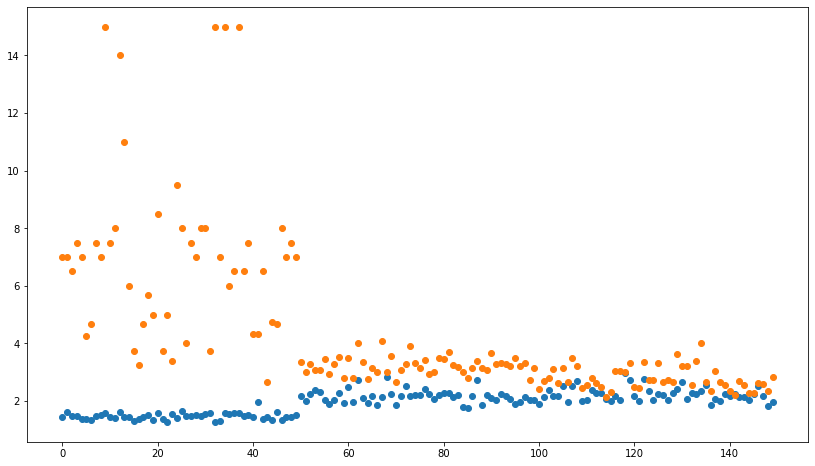

In [10]:
index = range(0,150)
plt.figure(figsize=(14,8))
plt.scatter(x=index,y=iris_df['x1'])

plt.scatter(x=index,y=iris_df['x2'])

In [11]:
iris_df.tail()

,x1,x2
145,2.233333,2.260870
146,2.520000,2.631579
147,2.166667,2.600000
148,1.823529,2.347826
149,1.966667,2.833333


In [12]:
def get_distance(x1,x2,y1,y2):
    d1=(y1-x1)**2
    d2=(y2-x2)**2
    return (d1+d2)

In [13]:
num_rows = iris_df.shape[0]
def initialize_kmeans_plus_plus(k):
    centroids_x1=[]
    centroids_x2=[]
    rand_num = np.random.randint(num_rows-1)
    first_centroid_x1 = iris_df['x1'].iloc[rand_num]
    first_centroid_x2 = iris_df['x2'].iloc[rand_num]
    centroids_x1.append(first_centroid_x1)
    centroids_x2.append(first_centroid_x2)
    
    for k_id in range(k-1):
        dist=[]
        for ind in range(num_rows):
            x1=iris_df['x1'].iloc[ind]
            x2=iris_df['x2'].iloc[ind]
            min_dist = sys.maxsize
            for cd in range(len(centroids_x1)):
                y1=centroids_x1[cd]
                y2=centroids_x2[cd]
                distance = get_distance(x1,x2,y1,y2)
                min_dist = min(min_dist,distance)
            dist.append(min_dist)
        mx_ind = np.argmax(np.array(dist))
        centroids_x1.append(iris_df['x1'].iloc[mx_ind])
        centroids_x2.append(iris_df['x2'].iloc[mx_ind])
    
    return centroids_x1,centroids_x2  

In [14]:
def kmeans_plus_plus(k,centroids_x1,centroids_x2):
    num_rows = iris_df.shape[0]
    cent_map=[]
    sums_x1=[]
    sums_x2=[]
    for ind in range(k):
        cent_map.append([])
        sums_x1.append(0)
        sums_x2.append(0)
    for ind in range(num_rows):
        x1=iris_df['x1'].iloc[ind]
        x2=iris_df['x2'].iloc[ind]
        min_dist = sys.maxsize
        mid=-1
        for cd in range(len(centroids_x1)):
            y1=centroids_x1[cd]
            y2=centroids_x2[cd]
            distance = get_distance(x1,x2,y1,y2)
            if mid==-1:
                mid=cd
                min_dist = distance
            else:
                if(distance<min_dist):
                    mid=cd
                    min_dist = distance
        cent_map[mid].append(ind)
    for ind in range(len(cent_map)):
        for cd in range(len(cent_map[ind])):
            index = cent_map[ind][cd]
            sums_x1[ind]+=iris_df['x1'].iloc[index]
            sums_x2[ind]+=iris_df['x2'].iloc[index]
    
    for ind in range(len(cent_map)):
        length = len(cent_map[ind])
        print(length)
        if(length>0):
            sums_x1[ind]=sums_x1[ind]/length
            sums_x2[ind]=sums_x2[ind]/length
    
    centroids_x1=sums_x1
    centroids_x2=sums_x2
    return centroids_x1,centroids_x2,cent_map

In [15]:
centroids_x1,centroids_x2=initialize_kmeans_plus_plus(3)
for u in range(len(centroids_x1)):
        print(centroids_x1[u],centroids_x2[u])

2.033333333333333 2.7222222222222223
1.2682926829268295 15.0
1.5882352941176472 8.5


In [16]:
final_map=[]
for turn in range(50):
    for u in range(len(centroids_x1)):
        print(centroids_x1[u],centroids_x2[u])
    print("***********************\n\n\n")
    centroids_x1,centroids_x2,cent_map = kmeans_plus_plus(3,centroids_x1,centroids_x2)
    final_map=cent_map
    

2.033333333333333 2.7222222222222223
1.2682926829268295 15.0
1.5882352941176472 8.5
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.4788141804347774 7.3678160919540225
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.4788141804347774 7.3678160919540225
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.4788141804347774 7.3678160919540225
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.4788141804347774 7.3678160919540225
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.4788141804347774 7.3678160919540225
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.4788141804347774 7.3678160919540225
***********************



116
5
29
2.0928950450949397 3.1673129041992576
1.5220456333595596 14.8
1.

In [17]:
iris_df['class']=iris_obj['class']

,x1,x2,class
0,1.457143,7.000000,0
1,1.633333,7.000000,0
2,1.468750,6.500000,0
3,1.483871,7.500000,0
4,1.388889,7.000000,0
...,...,...,...
145,2.233333,2.260870,2
146,2.520000,2.631579,2
147,2.166667,2.600000,2
148,1.823529,2.347826,2
